In [1]:
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("C:/Users/Adam/muzea.xlsx")
print(data.head())

                Nazwa  Liczba_zwiedzajacych  ile_mieszkancow  rozwody  \
0        DOLNOŚLĄSKIE               1978088          2904207     5797   
1  KUJAWSKO-POMORSKIE               1189942          2086210     4000   
2           LUBELSKIE               1371707          2139726     2483   
3            LUBUSKIE                253151          1018075     1937   
4             ŁÓDZKIE                988873          2493603     4267   

   separacje  uklad_krazenia  nowotwory  uklad_oddech  samoboj_na_10tys  \
0        175            47.7       25.2           3.7               1.8   
1        163            44.9       28.6           6.3               1.5   
2        150            51.5       21.2           4.7               2.2   
3         56            45.2       25.9           4.4               2.2   
4        263            45.5       23.0           5.0               1.9   

                Region  
0  południowo-zachodni  
1             północny  
2             wschodni  
3    półno

In [3]:
# SZEREG ROZDZIELCZY

type = data["Region"]

freq = type.value_counts()
print(freq)

wschodni               4
północno-zachodni      3
północny               3
centralny              2
południowy             2
południowo-zachodni    2
Name: Region, dtype: int64


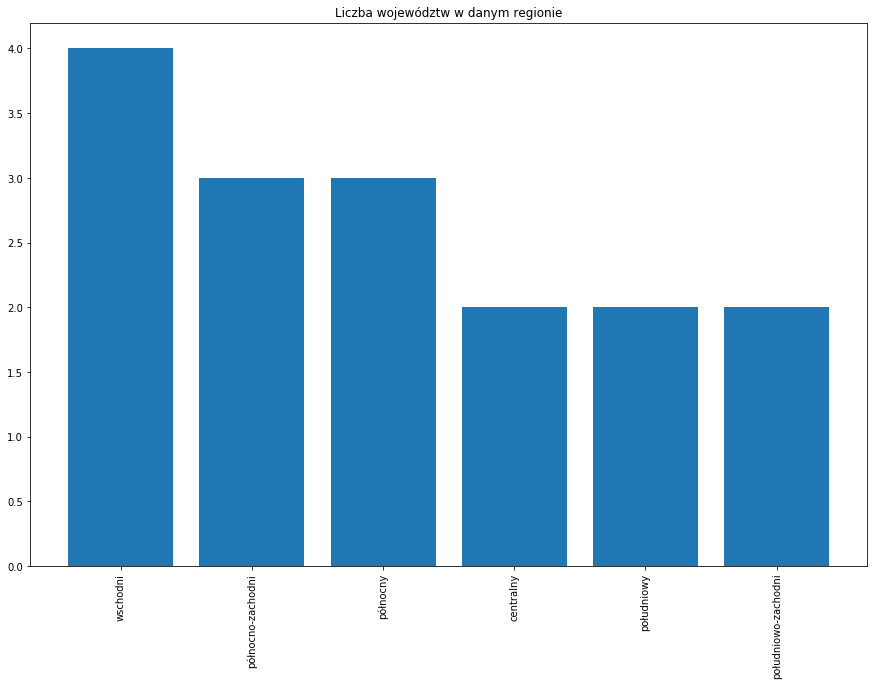

In [4]:
# Wykres słupkowy

x=np.arange(0,len(freq))
plt.figure(figsize=(15,10))
plt.bar(x,freq)
plt.xticks(x,freq.index, rotation=90)
plt.title("Liczba województw w danym regionie")
plt.show()

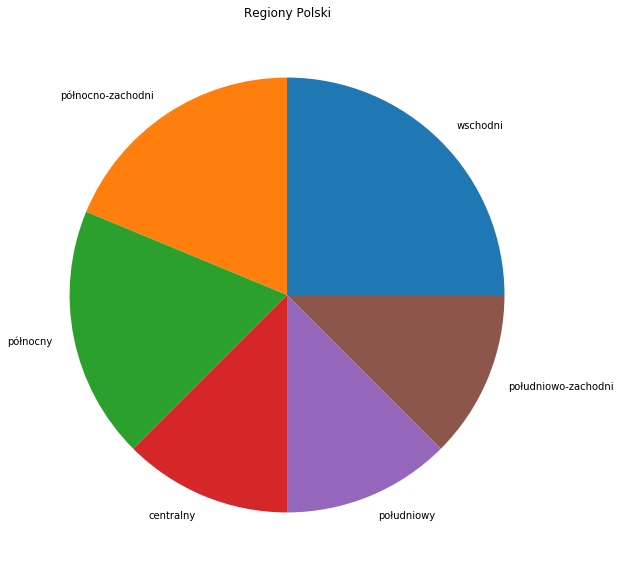

In [5]:
# Wykres kołowy

plt.figure(figsize=(15,10))
plt.pie(freq, labels=freq.index)
plt.title("Regiony Polski")
plt.show()

In [6]:
# Przygotowanie danych do analizy ststystycznej

lzm = data["Liczba_zwiedzajacych"]
rzw = data["rozwody"]
sep = data["separacje"]
ukr = data["uklad_krazenia"]
ntw = data["nowotwory"]
uod = data["uklad_oddech"]
sbj = data["samoboj_na_10tys"]
lm = data["ile_mieszkancow"]

In [7]:
# Średnia i odch. standardowe 2 zmiennych:

print('Liczba ludności w poszcz. wojewodztwach: średnia = %.2f,'
      ' odch. standardowe = %.2f'% (np.mean(lm), np.std(lm)))
print('Liczba zwiedzających muzea w poszcz. wojewodztwach: średnia = %.2f,'
      ' odch. standardowe = %.2f'% (np.mean(lzm), np.std(lzm)))

Liczba ludności w poszcz. wojewodztwach: średnia = 2402327.44, odch. standardowe = 1226671.43
Liczba zwiedzających muzea w poszcz. wojewodztwach: średnia = 2343943.00, odch. standardowe = 3276708.70


In [8]:
# KORELACJA (r-Pearsona)

# Czy liczba zwiedzających muzea w poszczególnych województwach jest skorelowana z liczbą mieszkańców?

from scipy.stats import pearsonr
corr, _ = pearsonr(lzm, lm)
print(corr)

0.6820735005588521


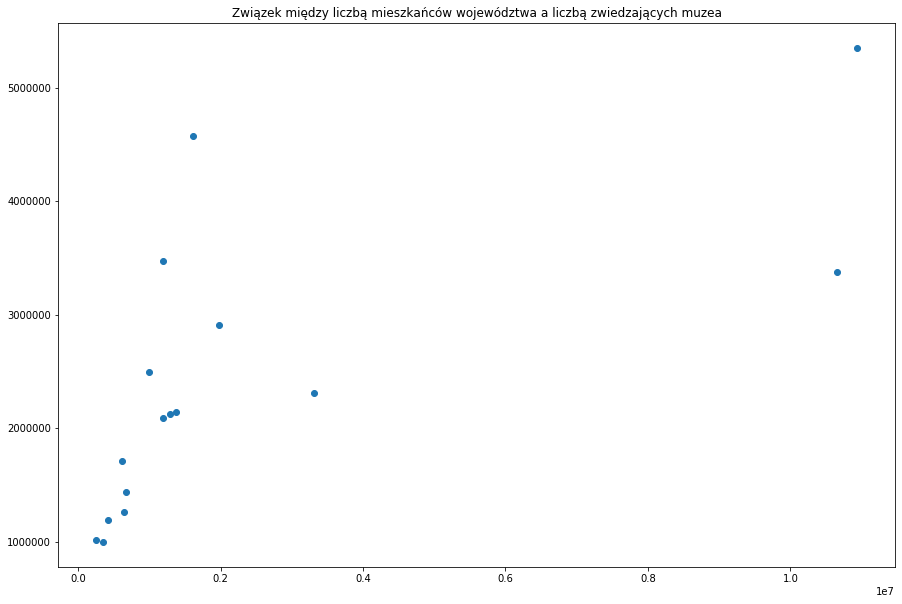

In [9]:
# Wykres ilustrujący ten związek

plt.figure(figsize=(15,10))
plt.scatter(lzm, lm)
plt.title("Związek między liczbą mieszkańców województwa a liczbą zwiedzających muzea")
plt.show()

In [10]:
# Czy liczba samobójstw w poszczególnych województwach
# jest skorelowana z liczbą rozwodów?

print('Liczba samobójstw na 10000 mieszkańców'
      ' w poszcz. wojewodztwach: średnia = %.2f,'
      ' odch. standardowe = %.2f'% (np.mean(sbj), np.std(sbj)))

print('Liczba rozwodów w poszcz. wojewodztwach: średnia = %.2f,'
      ' odch. standardowe = %.2f'% (np.mean(rzw), np.std(rzw)))

Liczba samobójstw na 10000 mieszkańców w poszcz. wojewodztwach: średnia = 1.74, odch. standardowe = 0.27
Liczba rozwodów w poszcz. wojewodztwach: średnia = 3801.06, odch. standardowe = 2110.09


In [11]:
corr, _ = pearsonr(sbj, rzw)
print(corr)

-0.5193122415497085


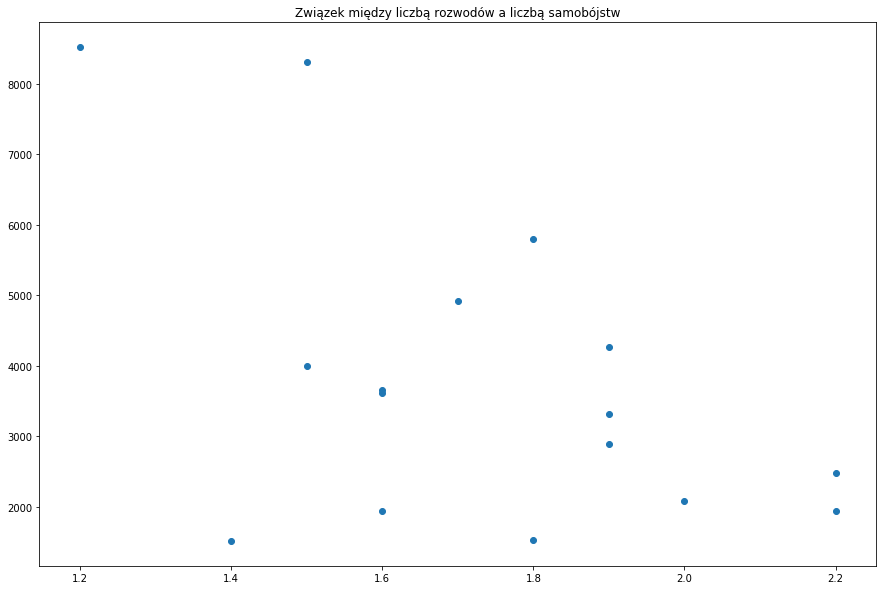

In [12]:
# Wykres ilustrujący ten związek

plt.figure(figsize=(15,10))
plt.scatter(sbj, rzw)
plt.title("Związek między liczbą rozwodów"
          " a liczbą samobójstw")
plt.show()

In [13]:
# Czy liczba rozwodów w poszczególnych województwach
# jest skorelowana z liczbą separacji?

print('Liczba separacji w poszcz. wojewodztwach: średnia = %.2f,'
      ' odch. standardowe = %.2f'% (np.mean(sep), np.std(sep)))
print('Liczba rozwodów w poszcz. wojewodztwach: średnia = %.2f,'
      ' odch. standardowe = %.2f'% (np.mean(rzw), np.std(rzw)))

Liczba separacji w poszcz. wojewodztwach: średnia = 173.38, odch. standardowe = 112.80
Liczba rozwodów w poszcz. wojewodztwach: średnia = 3801.06, odch. standardowe = 2110.09


In [14]:
corr, _ = pearsonr(sep, rzw)
print(corr)

0.8701540026702343


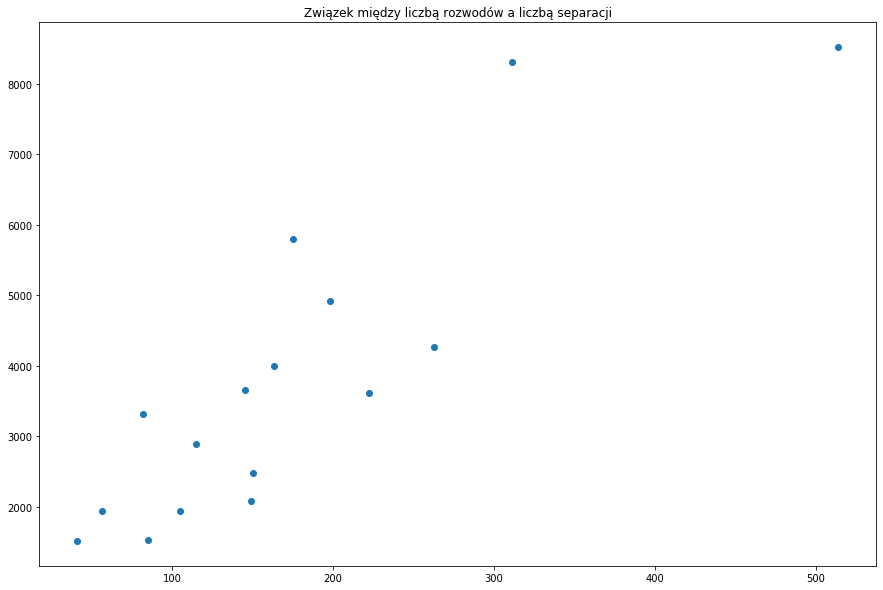

In [15]:
# Wykres ilustrujący ten związek

plt.figure(figsize=(15,10))
plt.scatter(sep, rzw)
plt.title("Związek między liczbą rozwodów"
          " a liczbą separacji")
plt.show()

In [16]:
# Czy liczba mieszkańców jest skorelowana 
# z odsetkiem zgonów z powodu chorów układu krążenia?

corr, _ = pearsonr(ukr, lm)
print(corr)

-0.17226024405118356


In [17]:
# Czy liczba mieszkańców jest skorelowana 
# z odsetkiem zgonów z powodu chorów nowotworowych?

corr, _ = pearsonr(ntw, lm)
print(corr)

0.10890015960209135


In [18]:
# Czy liczba mieszkańców jest skorelowana 
# z odsetkiem zgonów z powodu chorów układu oddechowego?

corr, _ = pearsonr(uod, lm)
print(corr)

-0.0765775087957212
